<a href="https://colab.research.google.com/github/jjunga1203/Books/blob/master/4_day_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
ls

drive/  sample_data/


In [5]:
ls drive/MyDrive/final_prj/class/

Apparel/  fashion.csv  Footwear/


In [6]:
dir_path = './drive/MyDrive/final_prj/class/'

In [4]:
from numpy import expand_dims
from keras.preprocessing.image import ImageDataGenerator    # ImageDataGenerator 이미지가 라벨링이 되야 하는데, 폴더를 구분해 놓으면 (개/고양이) 자동으로 라벨처리됨.
from keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [9]:
ls

drive/  nuriho.jpg  sample_data/


In [133]:
img = load_img('./nuriho.jpg')

In [134]:
data = img_to_array(img)

In [135]:
data.shape

(453, 680, 3)

In [16]:
samples = data[np.newaxis, :] # 새로운 축 하나를 생성 (전처리임)

In [15]:
samples.shape

(1, 453, 680, 3)

In [21]:
# 이미지를 80도 회전, 옆으로 0.2만큼 이동, 빈 공간은 근처 픽셀로 채운다.
datagen = ImageDataGenerator(rotation_range=80, width_shift_range=0.2, fill_mode='nearest')

In [22]:
it = datagen.flow(samples, batch_size=1)

In [26]:
len(it)

1

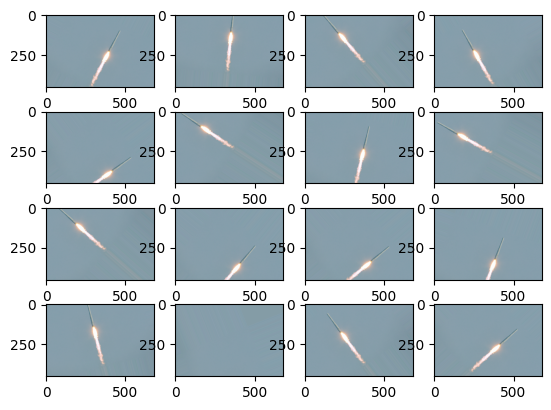

In [28]:
for i in range(16):
  plt.subplot(4, 4, i+1)
  sub_image = it.next()
  image = sub_image[0].astype('uint8')    # sub_image[0] --- 왜 0요소만 접근?? (x, y, sample_weight) : x 이미지, y 라벨(정답), 가중치
                                          # astype('uint8') 언사인드 int 0~256까지
  plt.imshow(image)

In [ ]:
img_path = './nuriho'

# ResNet50

일반적인 딥러닝 모델에서는 레이어가 깊어질수록 성능이 저하되는 경향이 있습니다. 이는 vanishing/exploding gradient 문제로 인해 발생할 수 있습니다.
ResNet은 이러한 문제를 해결하기 위해 잔차 블록(residual block)이라는 구조를 도입했습니다.
ResNet은 Microsoft Research에서 개발된 딥러닝 모델로, ImageNet Large Scale Visual Recognition Challenge(ILSVRC)에서 우수한 성능을 나타낸다.

ResNet50은 ResNet 아키텍처 중 하나로, 50개의 레이어로 구성됩니다.
ResNet50은 사전 훈련된(pre-trained) 형태로 공개되어 있어서, 전이 학습(transfer learning) 등의 방법을 사용하여 다양한 컴퓨터 비전 작업에 쉽게 적용

### ResNet50 설계도 (50-layer 사용)
1. 입력자료 (224, 224)
2. output_size = (7, 7, 2048)
3. ===> 출력물의 shape = (224, 224, 2)
4. =====> total_size / (224*224)   # 채널 수 : 2개

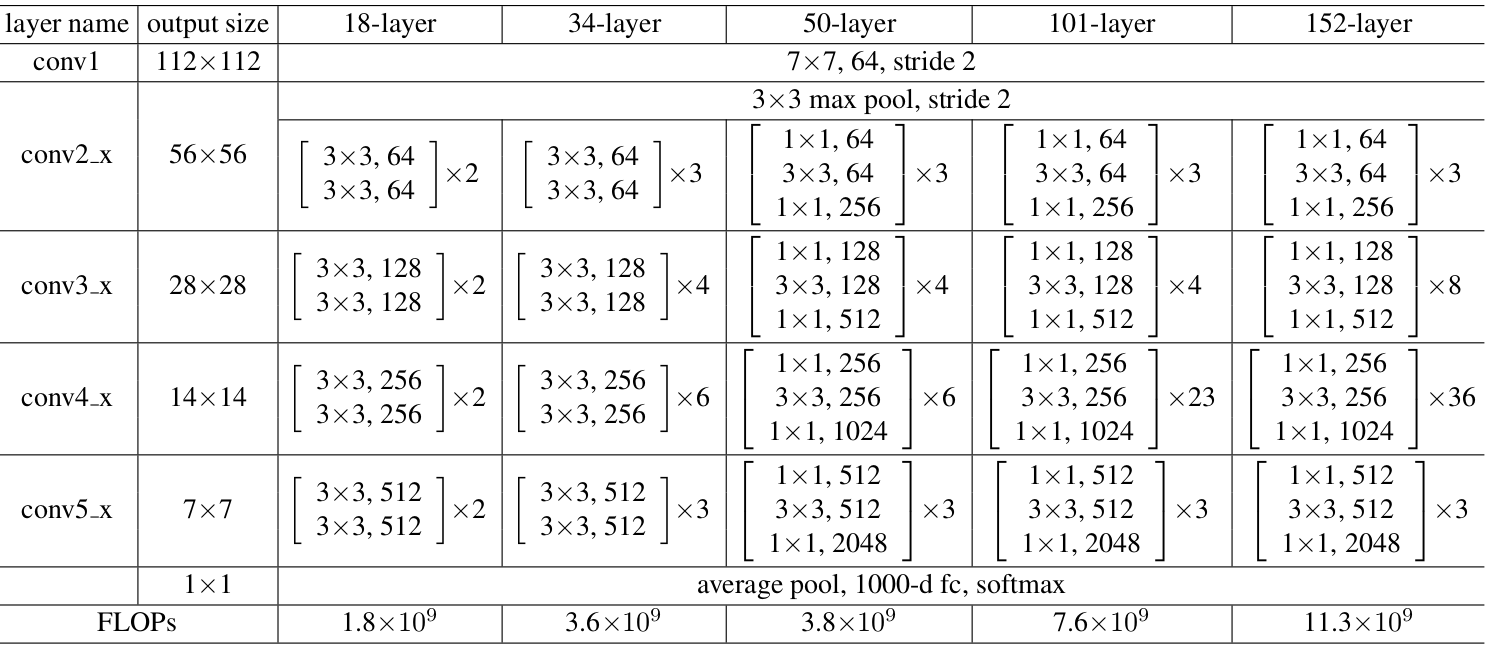

In [37]:
from sklearn.metrics import pairwise_distances
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Flatten
from tensorflow.keras.applications.resnet50 import ResNet50
from datetime import datetime
from IPython.display import Image, display
import pandas as pd

In [29]:
total_size = 7*7*2048

In [32]:
total_size / (224*224)   # 채널 수 : 2개   ---> 출력물 shape(224, 224, 2)

2.0

In [45]:
ls ./drive/MyDrive/final_prj/class

Apparel/  data/  data-20240501T071115Z-001.zip  fashion.csv  Footwear/


In [46]:
ls ./drive/MyDrive/final_prj/class/Footwear/

Men/  Women/


In [47]:
ls ./drive/MyDrive/final_prj/class/Footwear/Men/

Images/


In [48]:
ls ./drive/MyDrive/final_prj/class/Footwear/Men/Images/

images_with_product_ids/


In [49]:
ls ./drive/MyDrive/final_prj/class/Footwear/Men/Images/images_with_product_ids/

10037.jpg  15377.jpg  20802.jpg  24256.jpg  31949.jpg  36138.jpg  41869.jpg  47196.jpg  5899.jpg
10039.jpg  15378.jpg  20804.jpg  24257.jpg  31970.jpg  36139.jpg  42010.jpg  47197.jpg  59435.jpg
10097.jpg  15379.jpg  20805.jpg  24258.jpg  31971.jpg  36442.jpg  42011.jpg  47198.jpg  59943.jpg
10174.jpg  15382.jpg  20833.jpg  24259.jpg  31978.jpg  36957.jpg  42016.jpg  47199.jpg  6362.jpg
10180.jpg  15384.jpg  20856.jpg  24260.jpg  31979.jpg  37240.jpg  42017.jpg  47248.jpg  6396.jpg
10266.jpg  15385.jpg  20868.jpg  24408.jpg  31985.jpg  37241.jpg  42019.jpg  49059.jpg  6414.jpg
10267.jpg  15406.jpg  20869.jpg  24452.jpg  32191.jpg  37246.jpg  42020.jpg  49060.jpg  6423.jpg
10268.jpg  15510.jpg  20892.jpg  24453.jpg  32506.jpg  37247.jpg  42042.jpg  49061.jpg  6424.jpg
10293.jpg  15516.jpg  20893.jpg  24454.jpg  32507.jpg  37248.jpg  42043.jpg  49435.jpg  6440.jpg
10294.jpg  15517.jpg  20894.jpg  24462.jpg  32508.jpg  37249.jpg  42044.jpg  49461.jpg  6441.jpg
10295.jpg  15518.jpg  20895.

In [74]:
fashion_df = pd.read_csv(dir_path + 'fashion.csv')

In [75]:
fashion_df.tail()

,ProductId,Gender,Category,SubCategory,ProductType,Colour,Usage,ProductTitle,Image,ImageURL
2901,51755,Women,Footwear,Shoes,Casual Shoes,Black,Casual,Catwalk Women Black Shoes,51755.jpg,http://assets.myntassets.com/v1/images/style/p...
2902,47630,Women,Footwear,Shoes,Flats,Blue,Casual,Carlton London Women Blue Shoes,47630.jpg,http://assets.myntassets.com/v1/images/style/p...
2903,32836,Women,Footwear,Shoes,Flats,Pink,Casual,Grendha Women Flori Pink Sandals,32836.jpg,http://assets.myntassets.com/v1/images/style/p...
2904,35821,Women,Footwear,Shoes,Heels,Black,Casual,Enroute Women Black Heels,35821.jpg,http://assets.myntassets.com/v1/images/style/p...
2905,18553,Women,Footwear,Shoes,Heels,Blue,Casual,Catwalk Women Mary Janes Blue Flats,18553.jpg,http://assets.myntassets.com/v1/images/style/p...


In [42]:
# 모델 불러오기 (전이학습)
model = ResNet50(include_top=False, weights='imagenet')    # include_top=False 마지막 average fool층 제외

94765736/94765736 [==============================] - 1s 0us/step


In [43]:
datagen = ImageDataGenerator(rescale=1./255)

In [50]:
train_data_dir = dir_path + 'Footwear/Men/Images/'

In [52]:
generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=1,
    class_mode=None,  # 현재 디렉토리 안에 폴더가 여러개면 자동으로 라벨의 개수를 지정하겠다.
    shuffle=False
)

Found 810 images belonging to 1 classes.


In [58]:
itemcodes = []
for i in generator.filenames:
  itemcodes.append(i[i.find('/')+1:i.find('.')])     # 이미지 파일 이름만 (숫자만 가져오고자 함)

In [59]:
itemcodes[0:5]

['10037', '10039', '10097', '10174', '10180']

In [61]:
nb_train_samples = 810
epochs = 50
batch_size = 1

In [62]:
extracted_features = model.predict_generator(generator, nb_train_samples//batch_size)   # steps = 전체수//batch_size

<ipython-input-62-a79a536f2f6d>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  extracted_features = model.predict_generator(generator, nb_train_samples//batch_size)


In [63]:
extracted_features.shape

(810, 7, 7, 2048)

In [64]:
extracted_features = extracted_features.reshape((810, 100352))

In [65]:
extracted_features.shape

(810, 100352)

In [67]:
# ResNet50의 설계도 대로 진행되어 predict_generator한 결과를 파일로 저장
np.save(open(dir_path + 'Men_ResNet_features.npy', 'wb'), extracted_features)
np.save(open(dir_path + 'Men_ResNet_fasture_product_ids.npy', 'wb'), np.array(itemcodes))

np.save(open('./Men_ResNet_features.npy', 'wb'), extracted_features)
np.save(open('./Men_ResNet_feature_product_ids.npy', 'wb'), np.array(itemcodes))

In [68]:
ls

drive/                              Men_ResNet_feature_product_ids.npy  nuriho.jpg
Men_ResNet_fasture_product_ids.npy  Men_ResNet_features.npy             sample_data/


In [77]:
fashion_men_df = fashion_df[fashion_df['Gender'] == 'Men']

In [92]:
fashion_men_df.head(10)

,ProductId,Gender,Category,SubCategory,ProductType,Colour,Usage,ProductTitle,Image,ImageURL
1326,9204,Men,Footwear,Shoes,Casual Shoes,Black,Casual,Puma Men Future Cat Remix SF Black Casual Shoes,9204.jpg,http://assets.myntassets.com/v1/images/style/p...
1327,18653,Men,Footwear,Flip Flops,Flip Flops,Black,Casual,Fila Men Cush Flex Black Slippers,18653.jpg,http://assets.myntassets.com/v1/images/style/p...
1328,12967,Men,Footwear,Sandal,Sandals,Black,Casual,ADIDAS Men Spry M Black Sandals,12967.jpg,http://assets.myntassets.com/v1/images/style/p...
1329,9036,Men,Footwear,Shoes,Formal Shoes,Black,Formal,Buckaroo Men Flores Black Formal Shoes,9036.jpg,http://assets.myntassets.com/v1/images/style/p...
1330,39988,Men,Footwear,Shoes,Casual Shoes,White,Casual,Gas Men Europa White Shoes,39988.jpg,http://assets.myntassets.com/v1/images/style/p...
1331,3168,Men,Footwear,Shoes,Sports Shoes,White,Sports,Nike Men's Incinerate MSL White Blue Shoe,3168.jpg,http://assets.myntassets.com/v1/images/style/p...
1332,10268,Men,Footwear,Shoes,Formal Shoes,Black,Formal,Clarks Men Hang Work Leather Black Formal Shoes,10268.jpg,http://assets.myntassets.com/v1/images/style/p...
1333,59435,Men,Footwear,Shoes,Formal Shoes,Black,Formal,Arrow Men Black Formal Shoes,59435.jpg,http://assets.myntassets.com/v1/images/style/p...
1334,22198,Men,Footwear,Shoes,Casual Shoes,Black,Casual,Timberland Men Black Casual Shoes,22198.jpg,http://assets.myntassets.com/v1/images/style/p...
1335,29570,Men,Footwear,Shoes,Casual Shoes,Purple,Casual,Vans Men Classic Slip-On Purple & Black Shoes,29570.jpg,http://assets.myntassets.com/v1/images/style/p...


In [80]:
extracted_features = np.load('./Men_ResNet_features.npy')
productids = np.load('./Men_ResNet_feature_product_ids.npy')

In [81]:
type(extracted_features), type(productids)

(numpy.ndarray, numpy.ndarray)

In [85]:
productids = list(productids)
productids.index('13359')

67

In [89]:
extracted_features[67]

array([0.       , 0.       , 0.       , ..., 4.3555055, 0.       ,
       0.       ], dtype=float32)

In [93]:
productids.index('10294'), extracted_features[9]

(9,
 array([0.     , 0.     , 0.     , ..., 4.73459, 0.     , 0.     ],
       dtype=float32))

In [95]:
# 9번째 이미지의 값과 모든 이미지와의 거리를 계산
pairwise_dist = pairwise_distances(extracted_features, extracted_features[9].reshape(1, -1))  # reshape(1, -1) 수학적 편의성을 위하여

In [97]:
len(pairwise_dist), pairwise_dist[:10]

(810,
 array([[3.0386272e+01],
        [3.2449043e+01],
        [2.8353247e+01],
        [9.2139282e+01],
        [3.4214443e+01],
        [3.2782070e+01],
        [4.7315083e+01],
        [2.4667772e+01],
        [4.3021759e+01],
        [6.6072494e-06]], dtype=float32))

In [98]:
indices = np.argsort(pairwise_dist.flatten())[0:5]    # 거리가 짧은 순으로 5개까지 반환 (비슷한 이미지)

In [99]:
indices

array([  9,  22, 203, 715,  12])

In [101]:
productids[22], productids[9]

('11923', '10294')

In [102]:
real_dists = np.sort(pairwise_dist.flatten())[0:5]

In [103]:
real_dists

array([6.6072494e-06, 1.8481653e+01, 1.8839081e+01, 2.0557943e+01,
       2.0824535e+01], dtype=float32)

In [104]:
fashion_men_df[fashion_men_df['ProductId'] == 10294]

,ProductId,Gender,Category,SubCategory,ProductType,Colour,Usage,ProductTitle,Image,ImageURL
1720,10294,Men,Footwear,Shoes,Formal Shoes,Brown,Formal,Clarks Men Feeling Good Leather Brown Formal S...,10294.jpg,http://assets.myntassets.com/v1/images/style/p...


In [105]:
fashion_men_df[fashion_men_df['ProductId'] == 10294][['ProductTitle', 'ImageURL']]

,ProductTitle,ImageURL
1720,Clarks Men Feeling Good Leather Brown Formal S...,http://assets.myntassets.com/v1/images/style/p...


In [120]:
ip_row = fashion_men_df[['ImageURL', 'ProductTitle']].loc[fashion_men_df['ProductId']==int(productids[9])]
ip_row

,ImageURL,ProductTitle
1720,http://assets.myntassets.com/v1/images/style/p...,Clarks Men Feeling Good Leather Brown Formal S...


In [130]:
img_url = list(ip_row['ImageURL'])

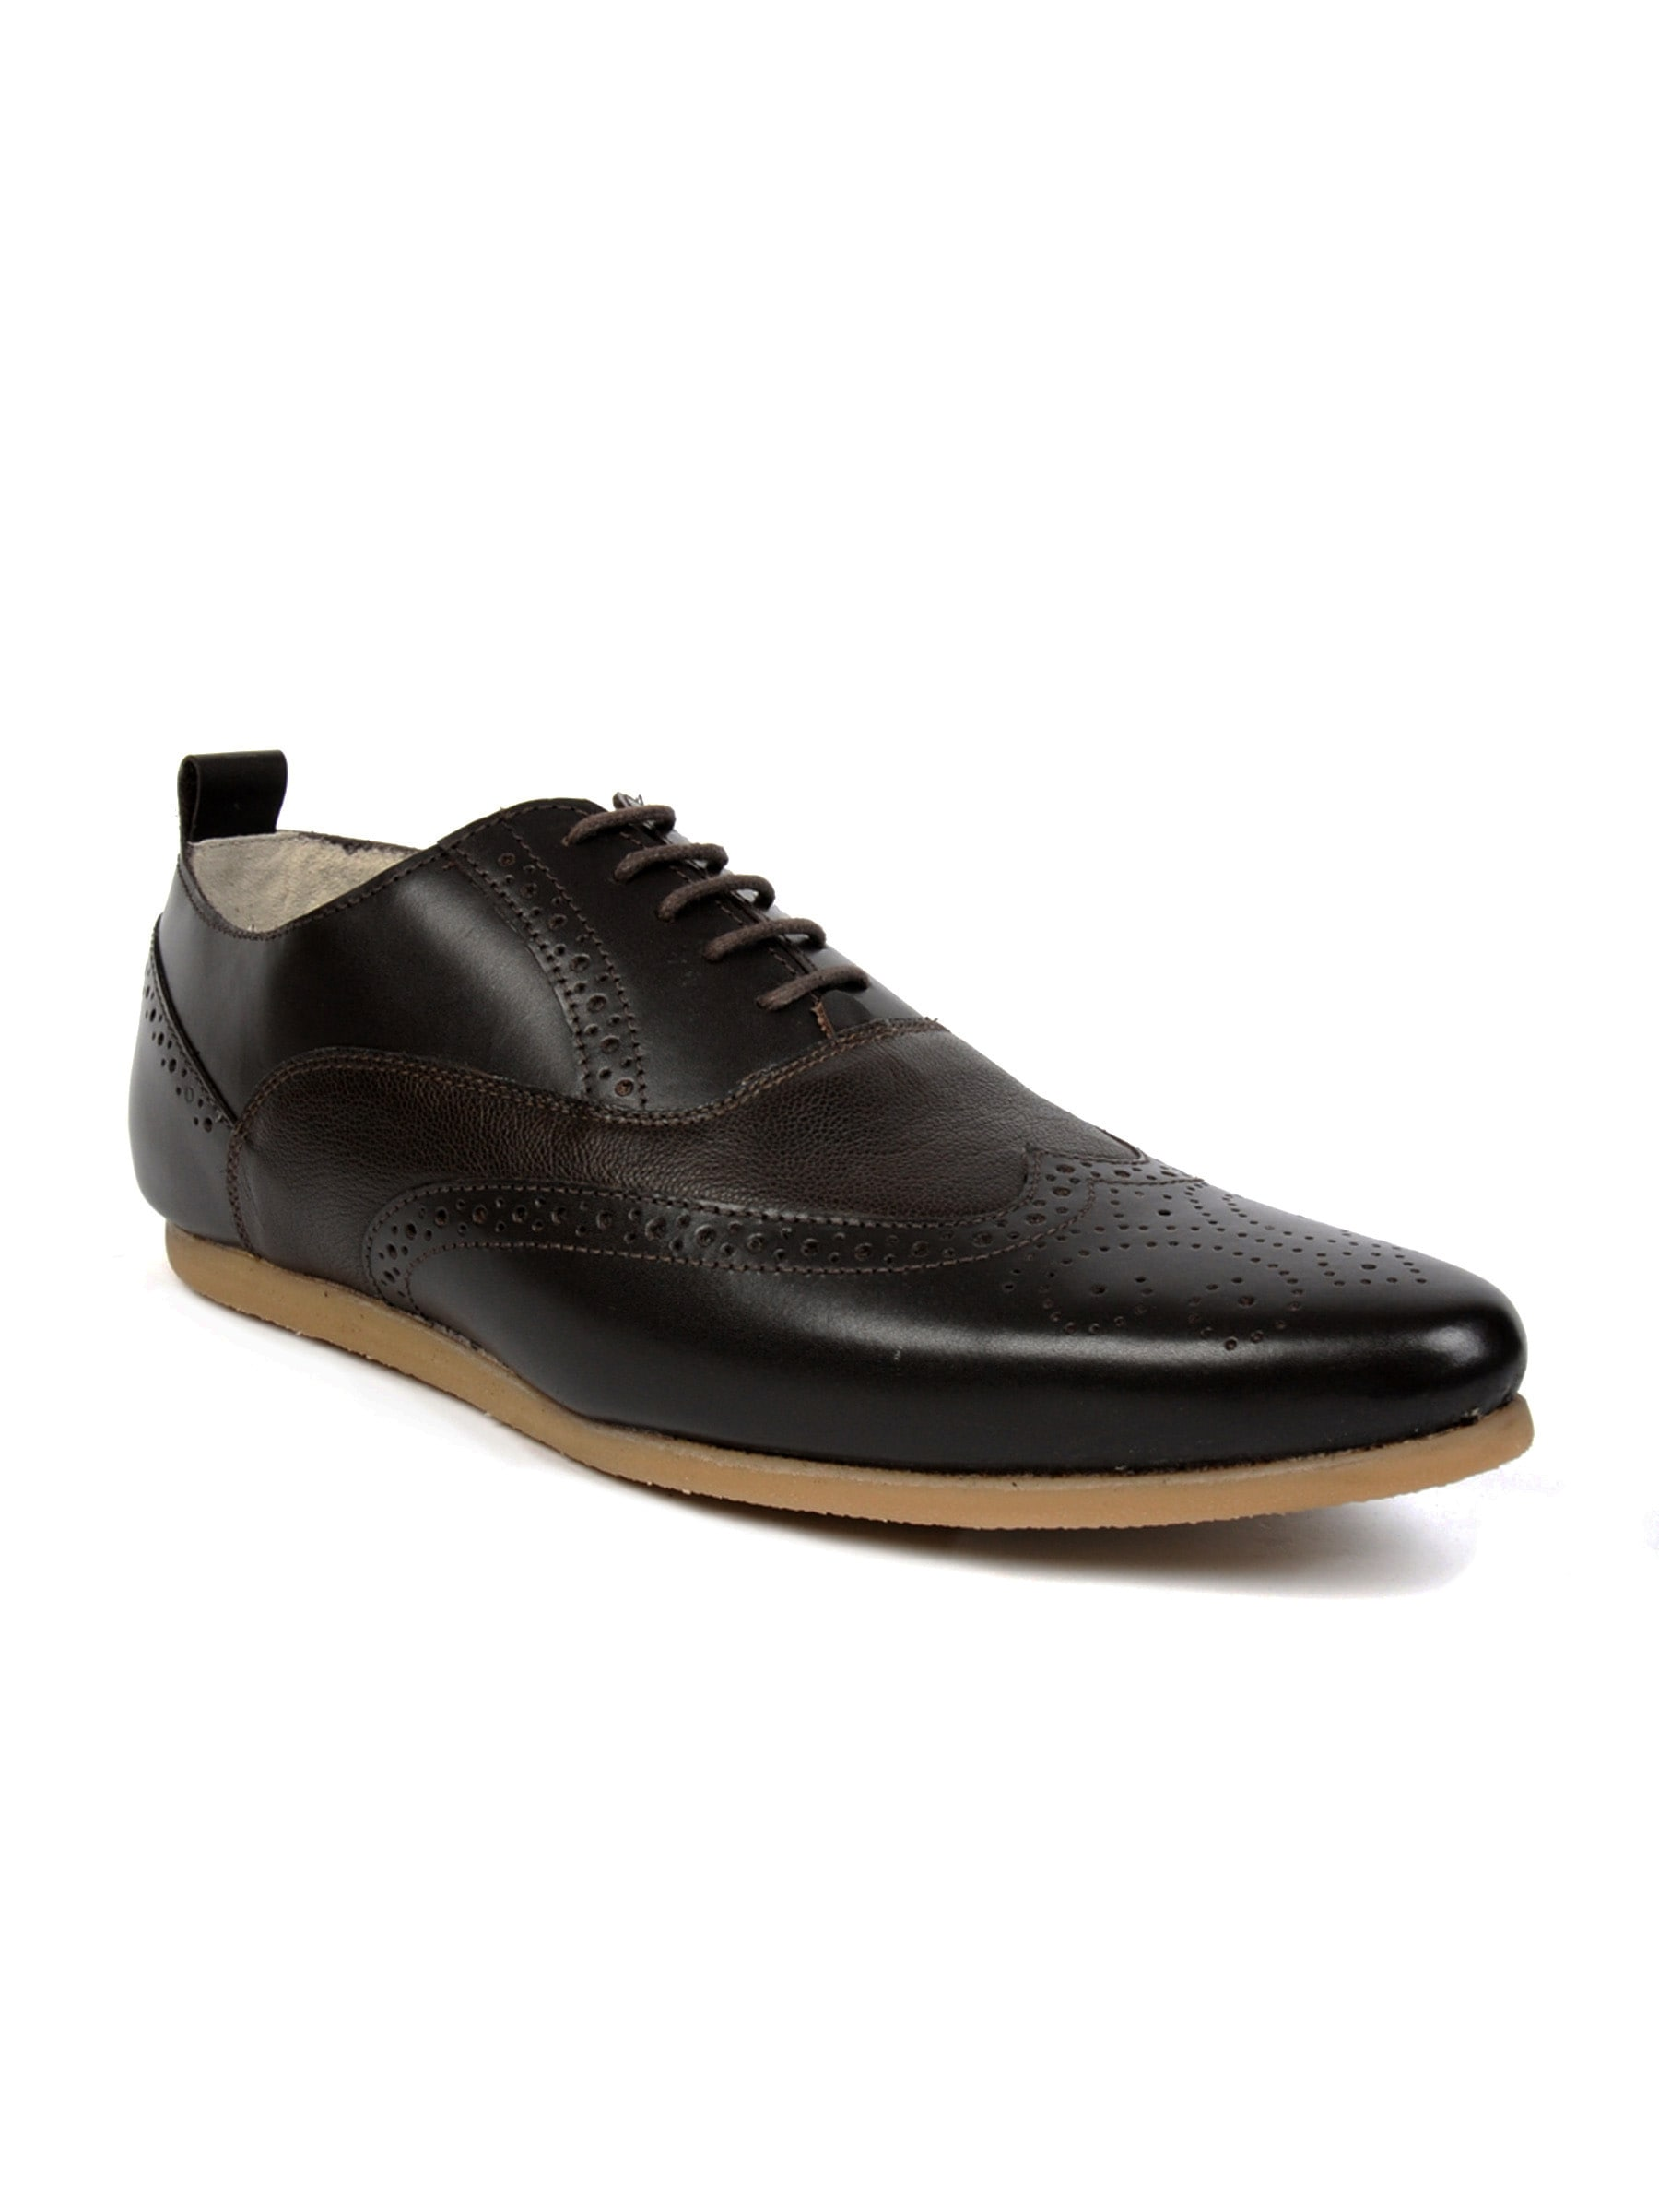

1357    http://assets.myntassets.com/v1/images/style/p...
Name: ImageURL, dtype: object


In [132]:
# 9번째 존재한 상품의 url 로 상품 이미지 확인하기
display(Image(url=img_url[0], width=224, height=224, embed=True))   # IPython 의 display
print(ip_row['ImageURL'])
image.show()


In [118]:
# from PIL import Image, ImageFile
# import urllib.request
from IPython.display import display, Image

In [ ]:
# display(Image(url=mini_df['ImageURL'],

9
1720


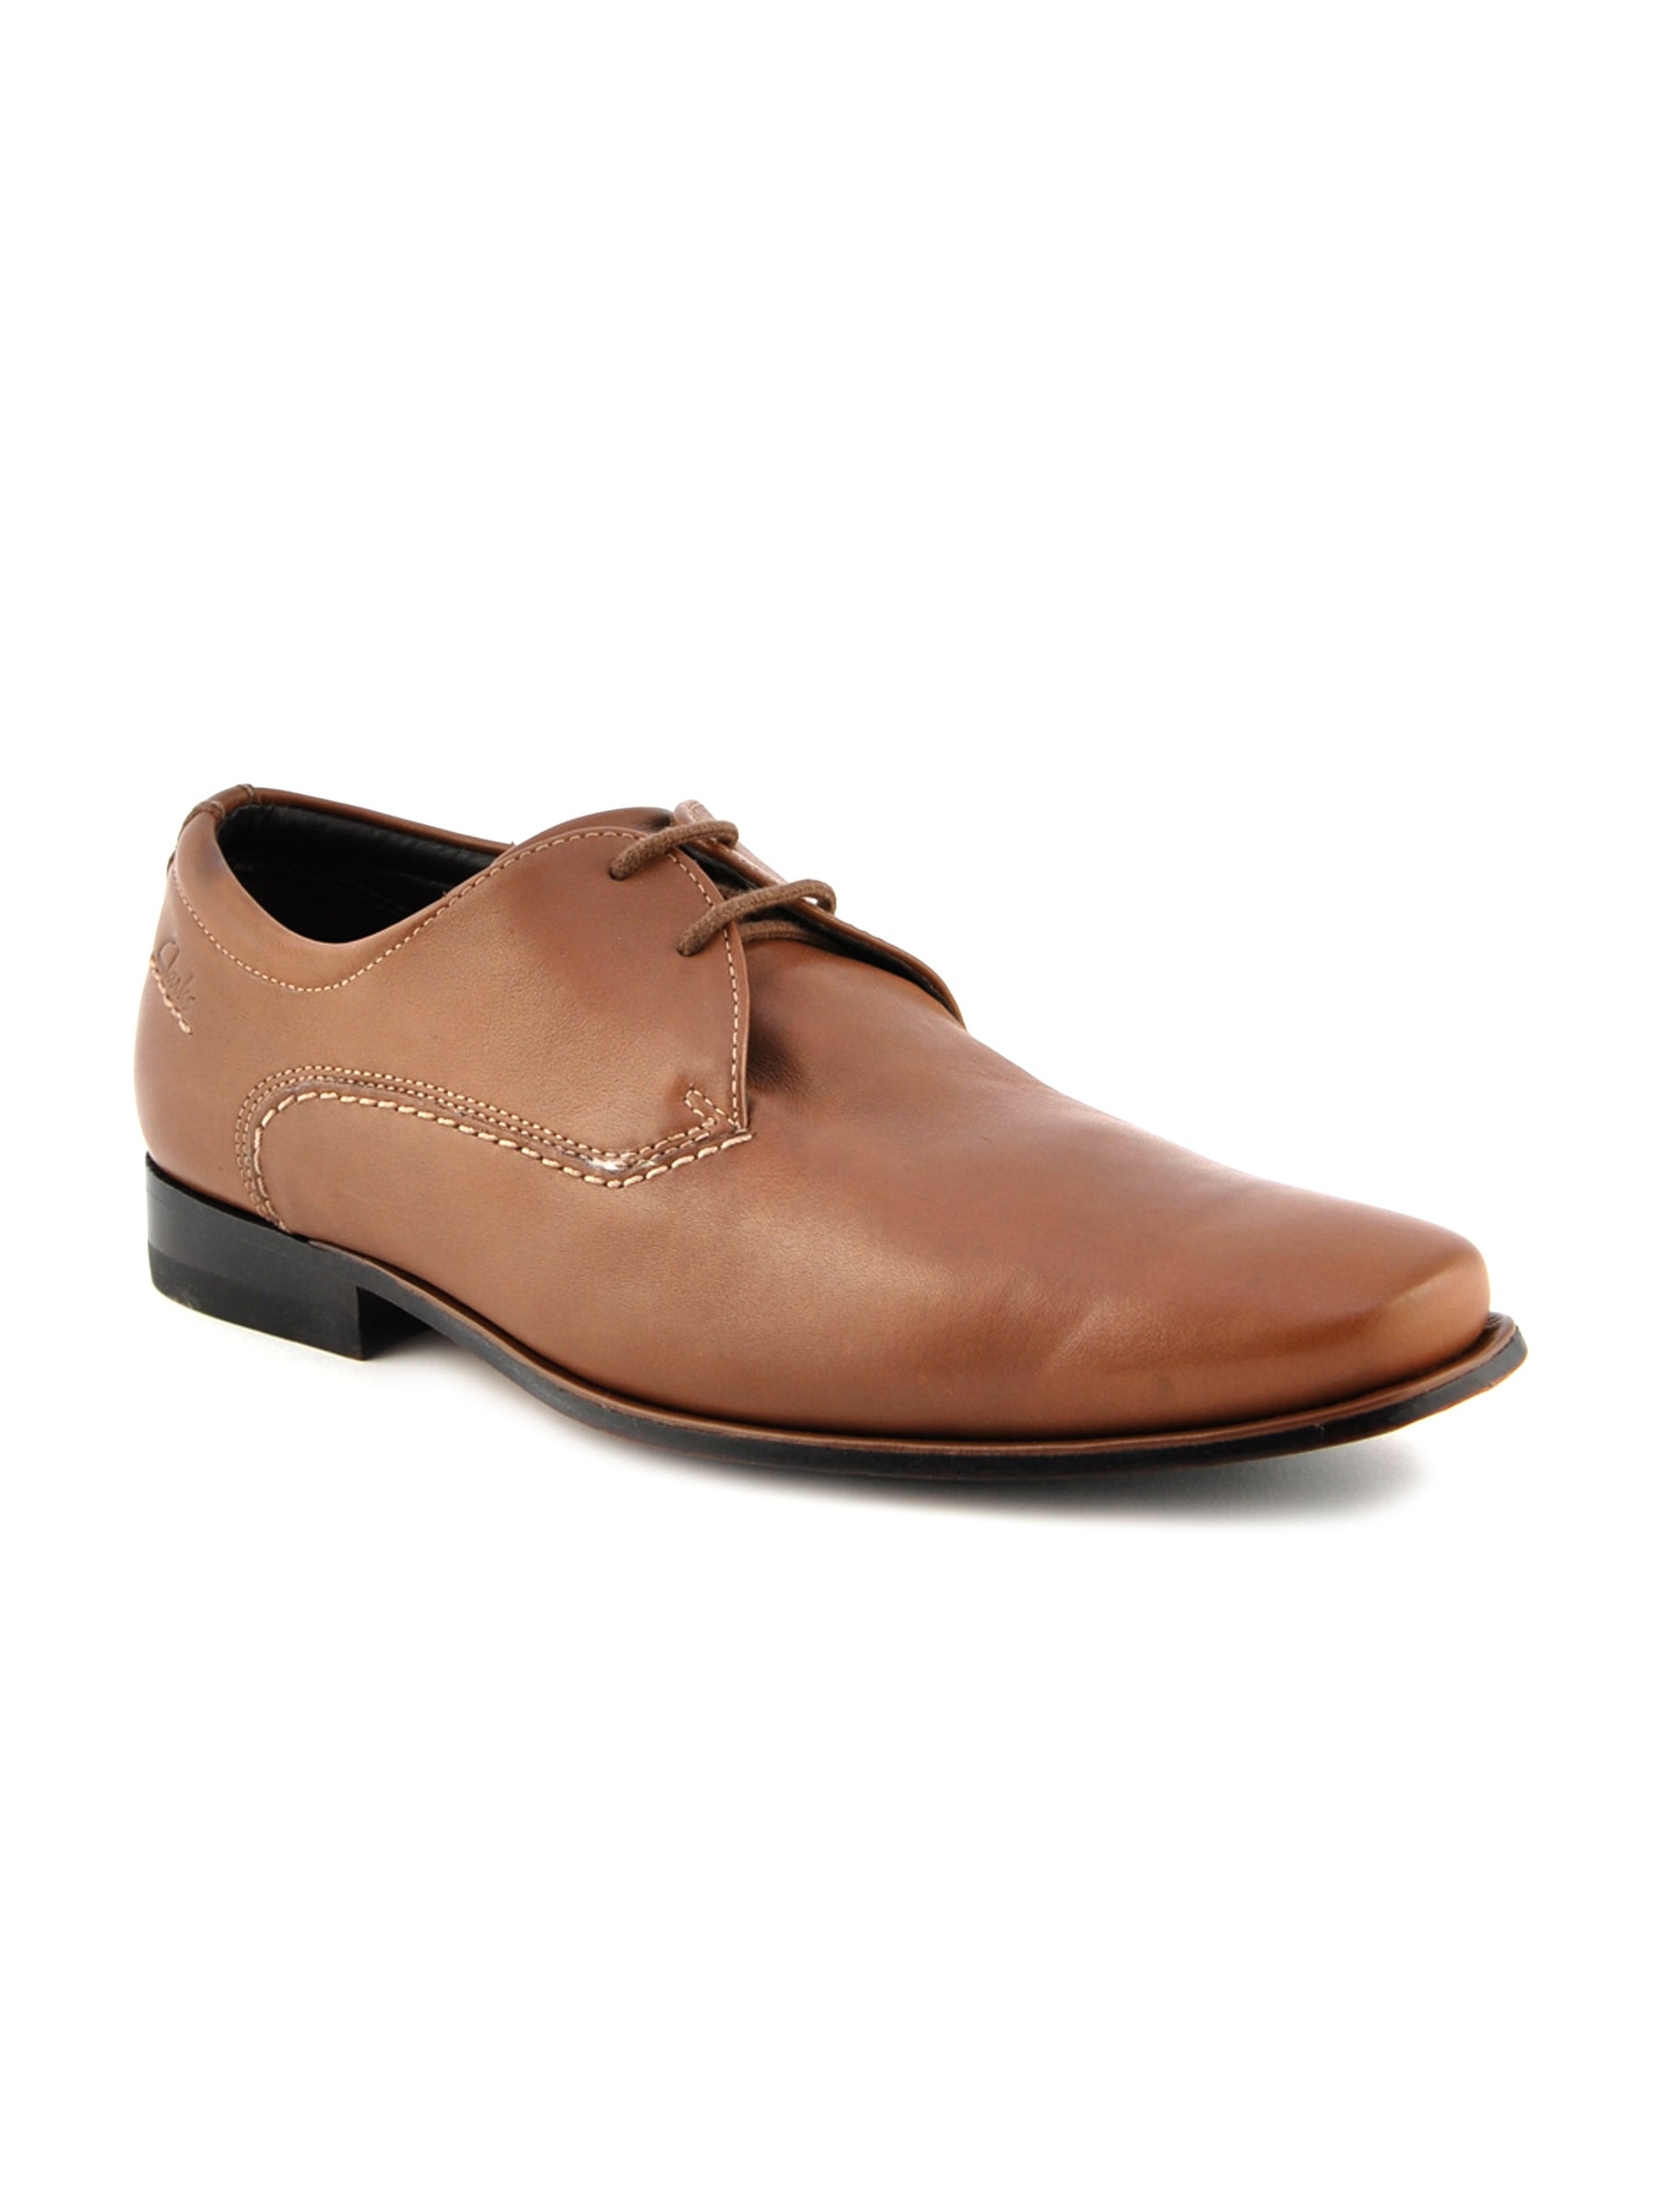

Clarks Men Feeling Good Leather Brown Formal Shoes
22
2067


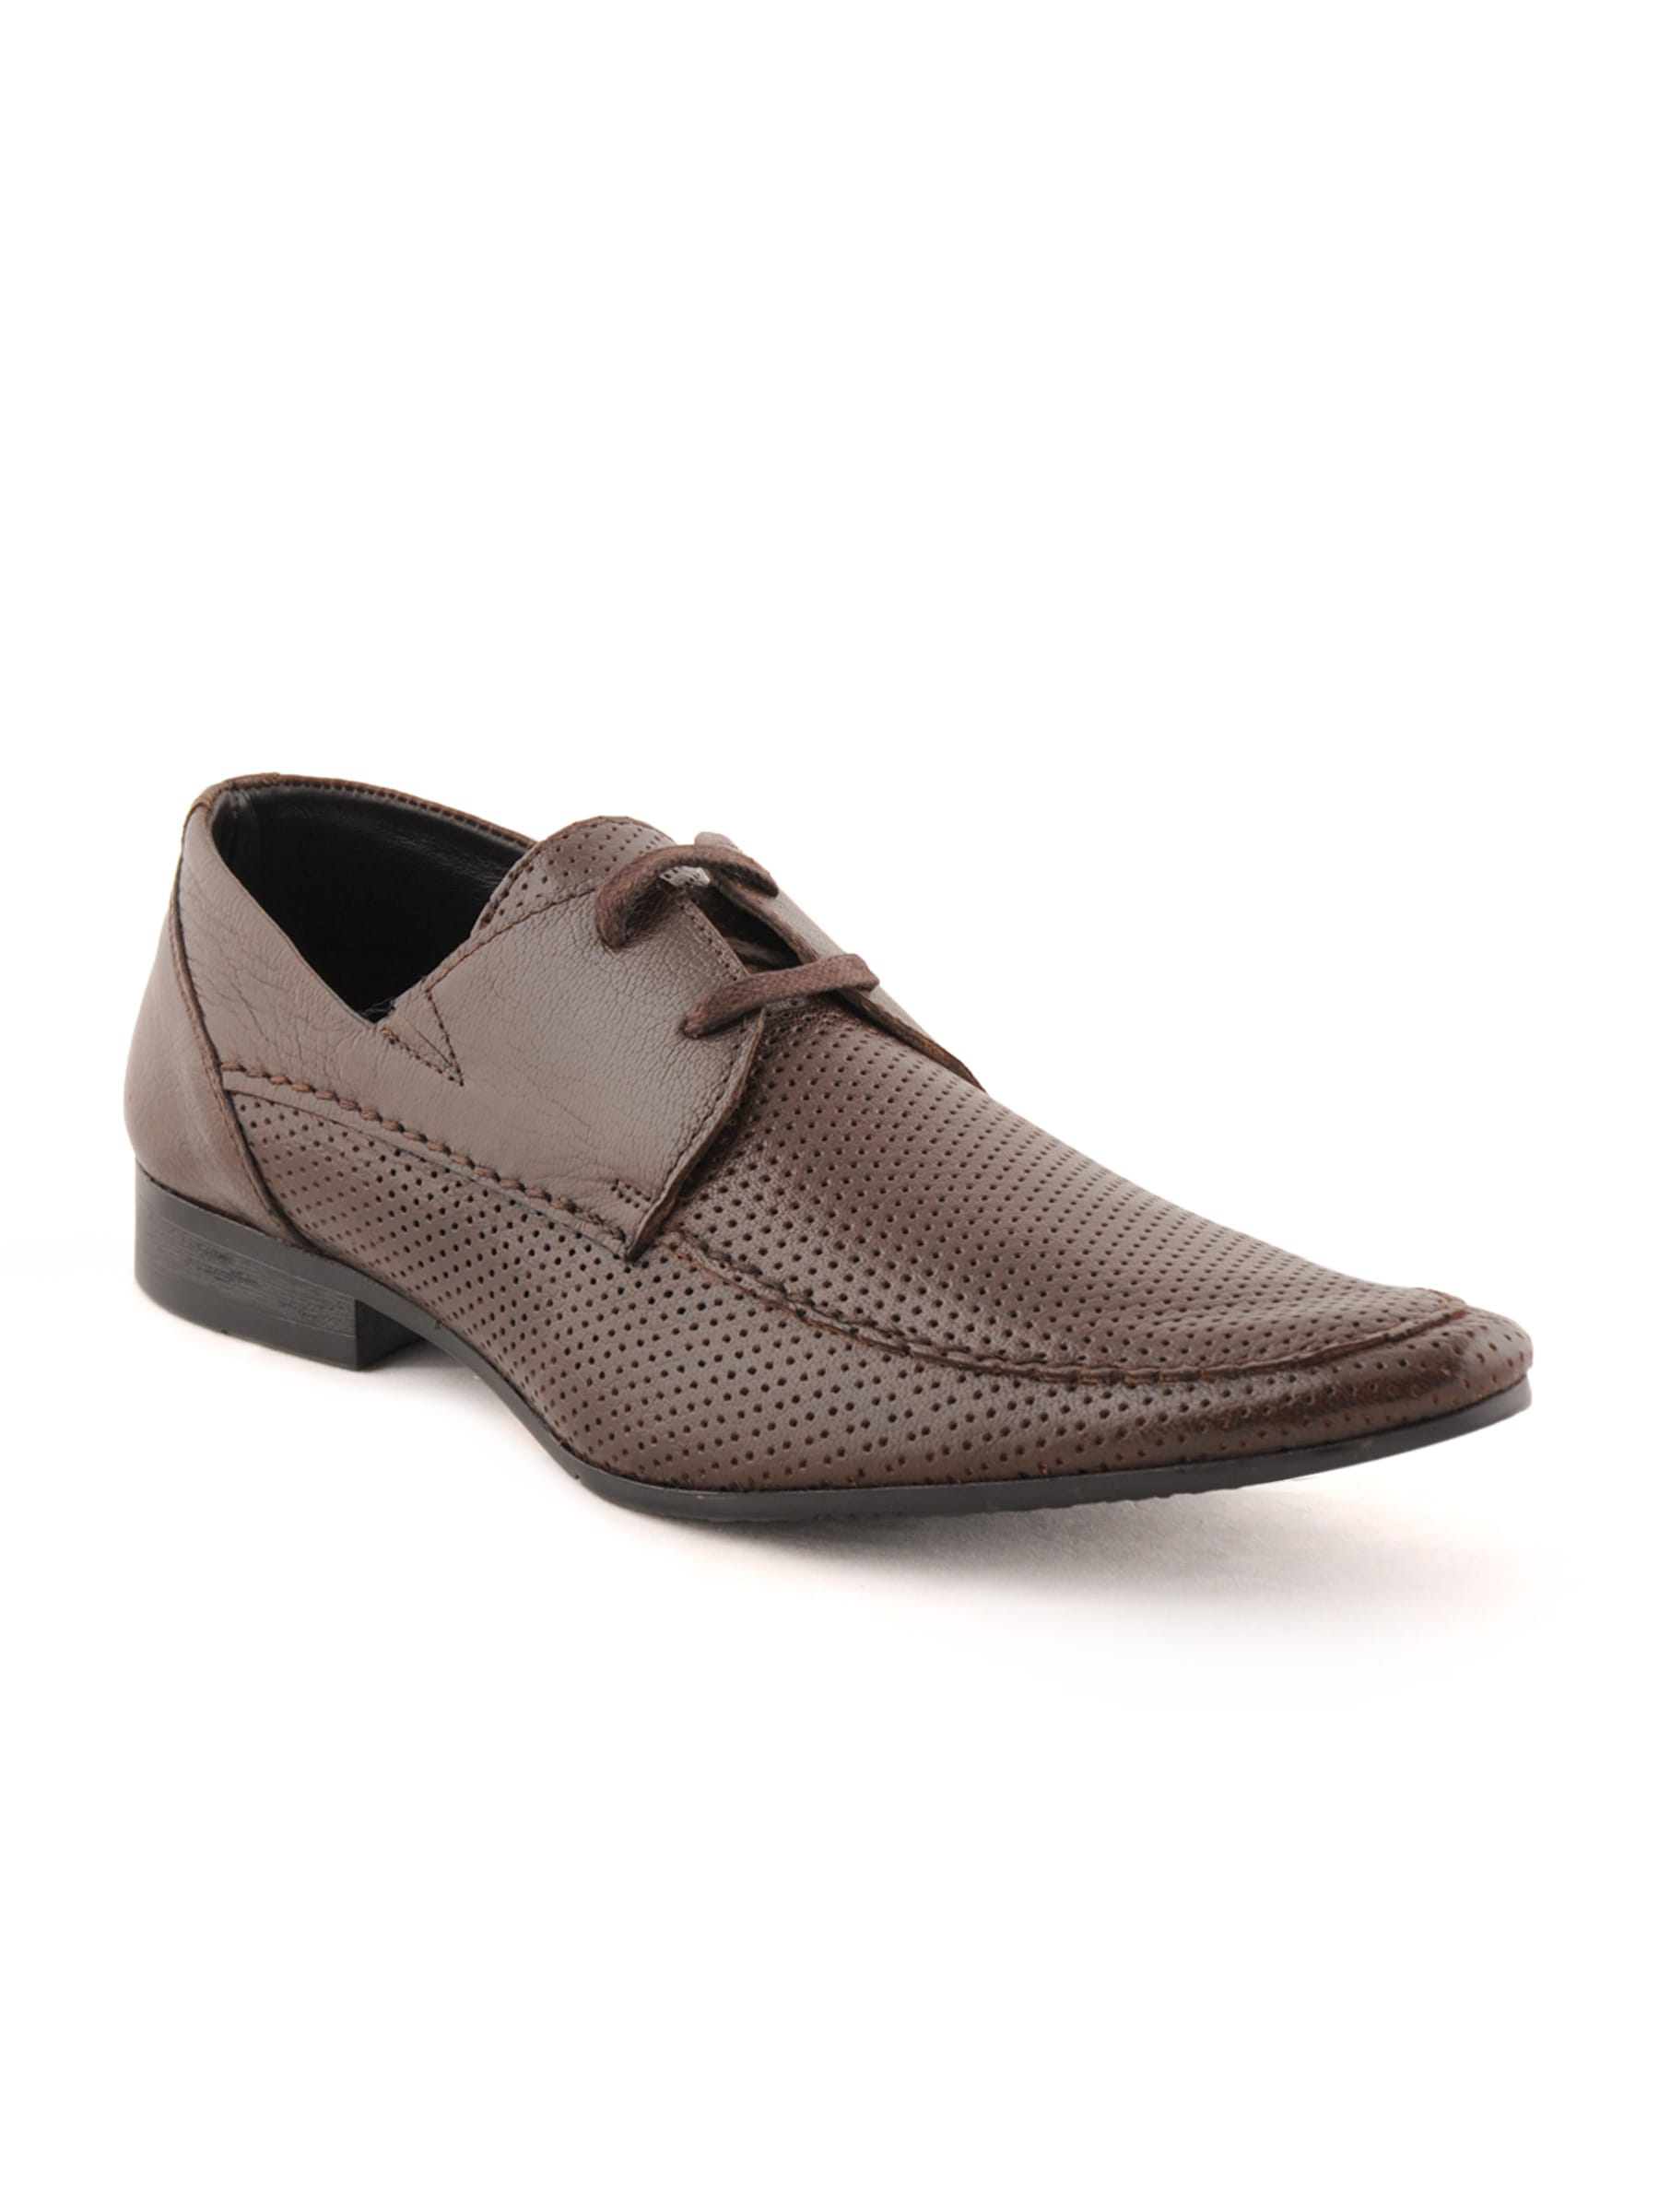

Franco Leone Men Formal Brown Formal Shoes
203
1579


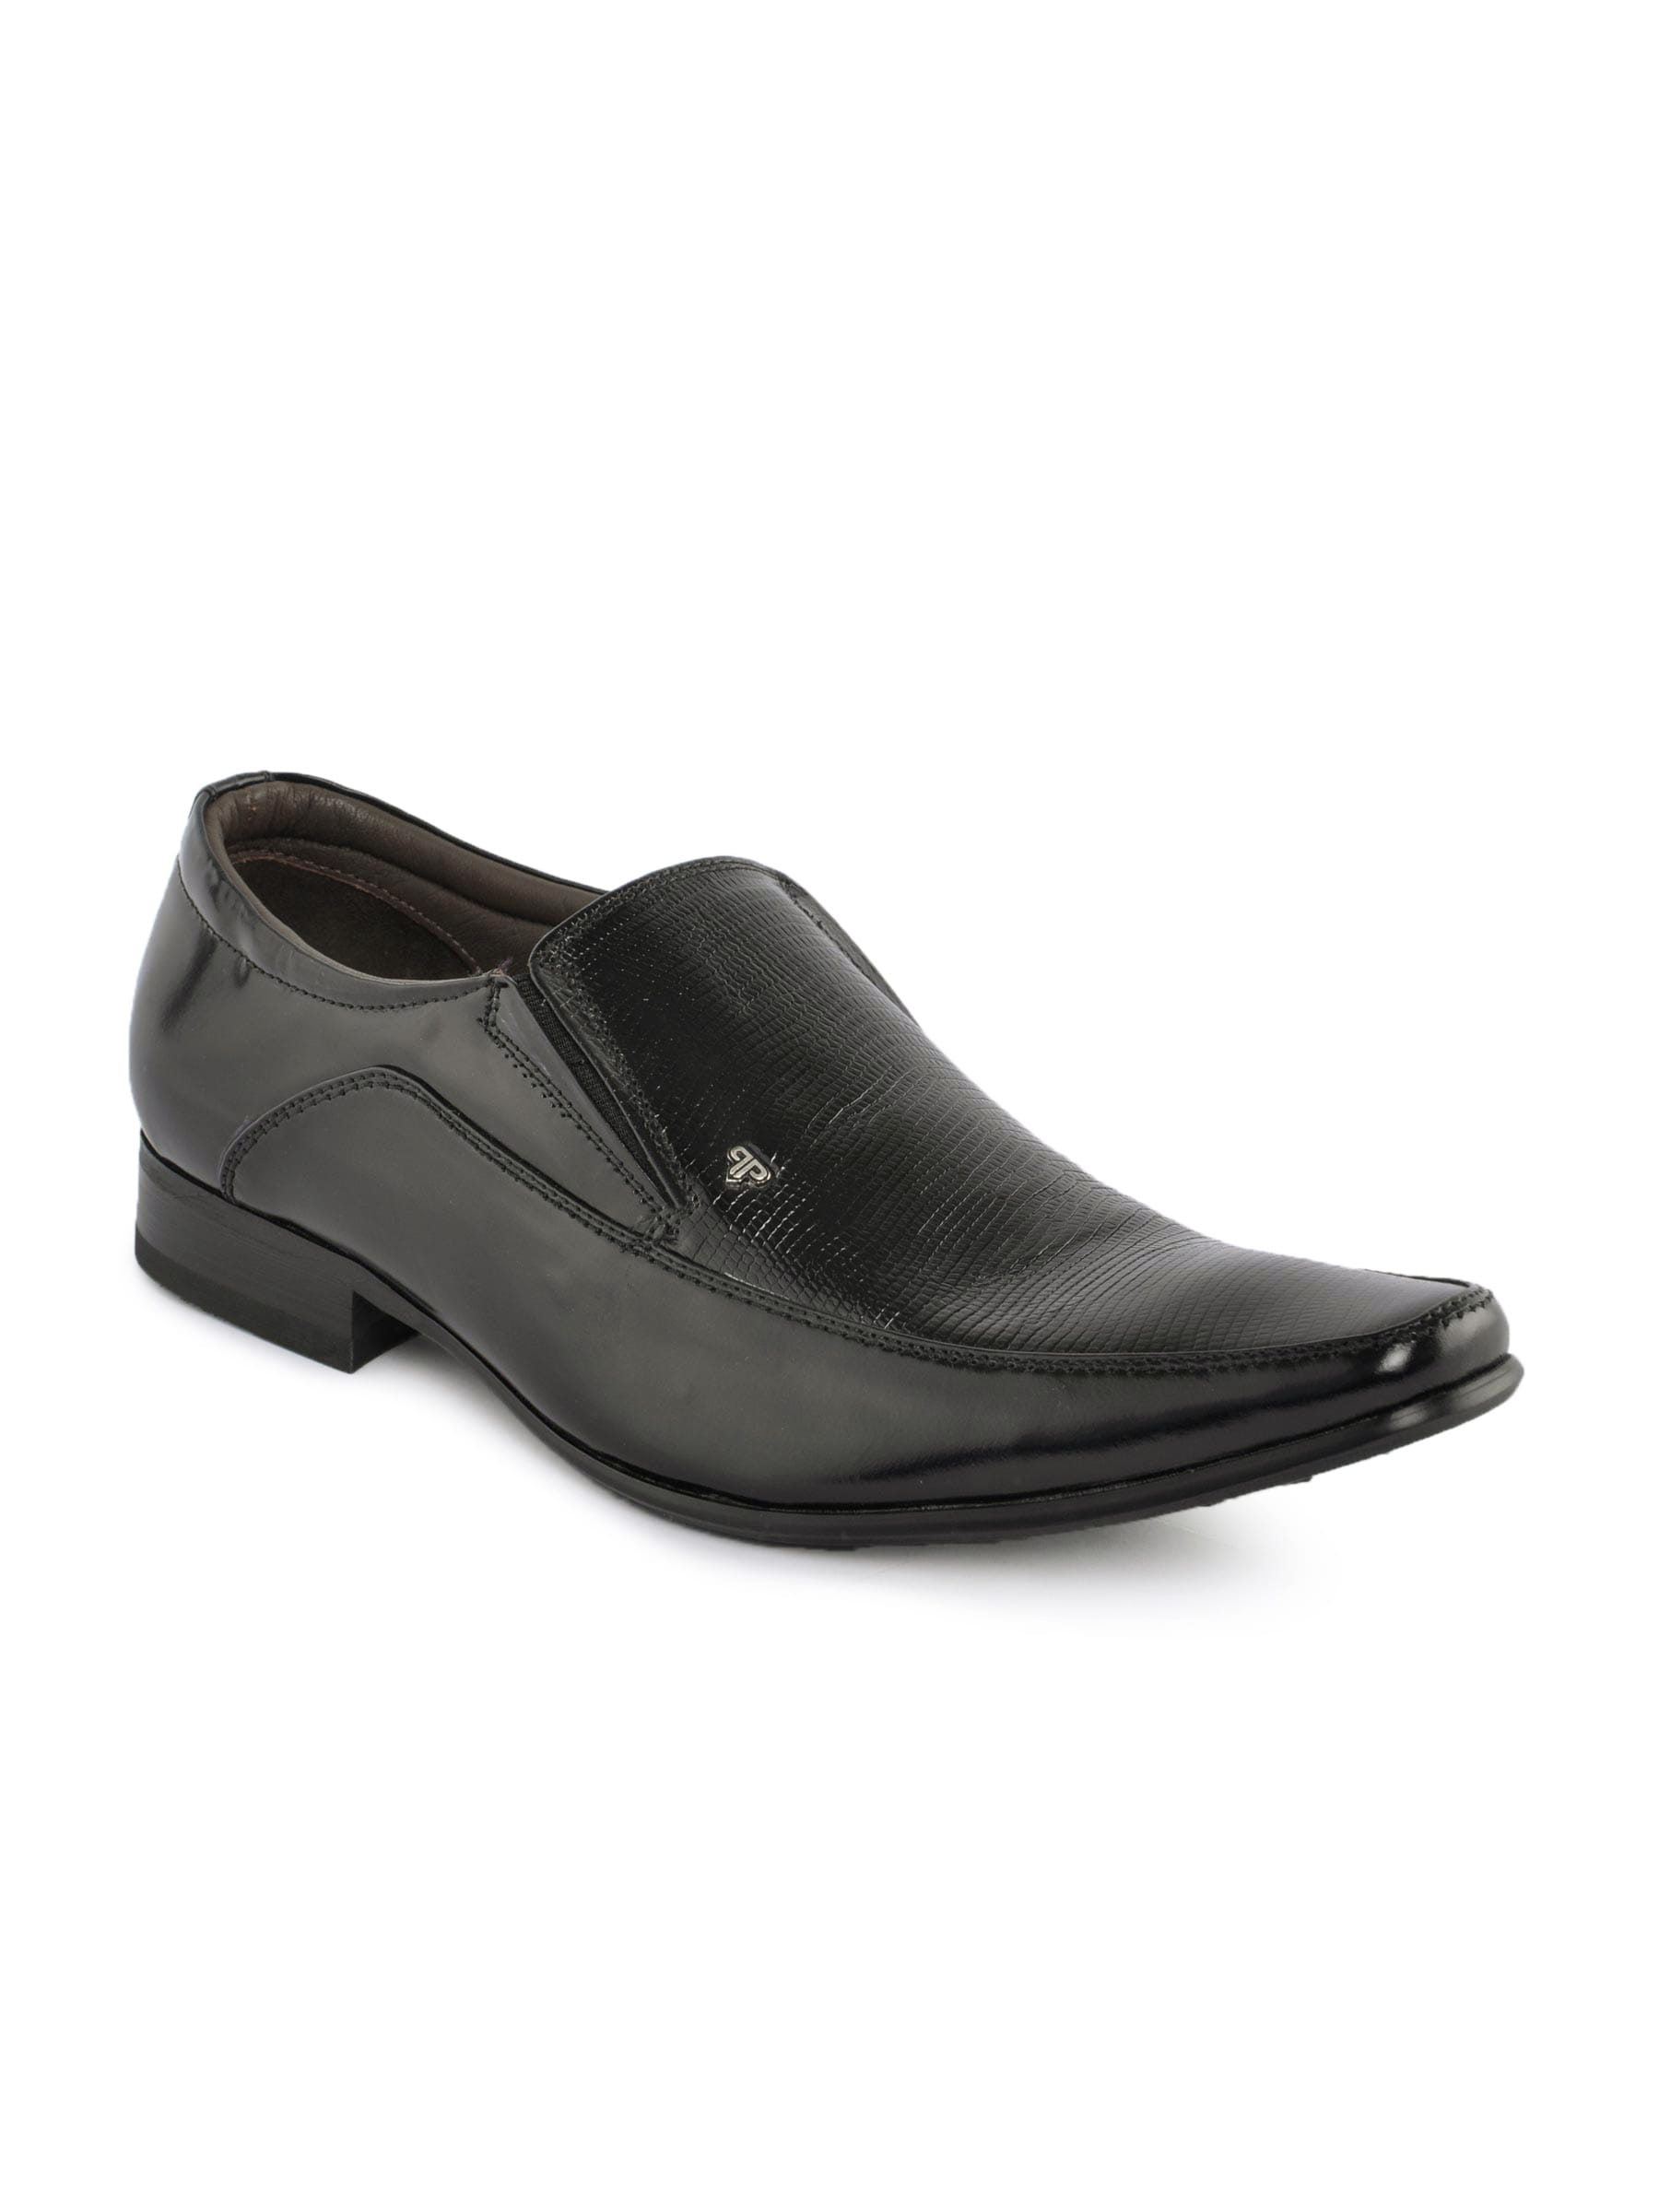

Provouge Men Black Formal Shoes
715
1640


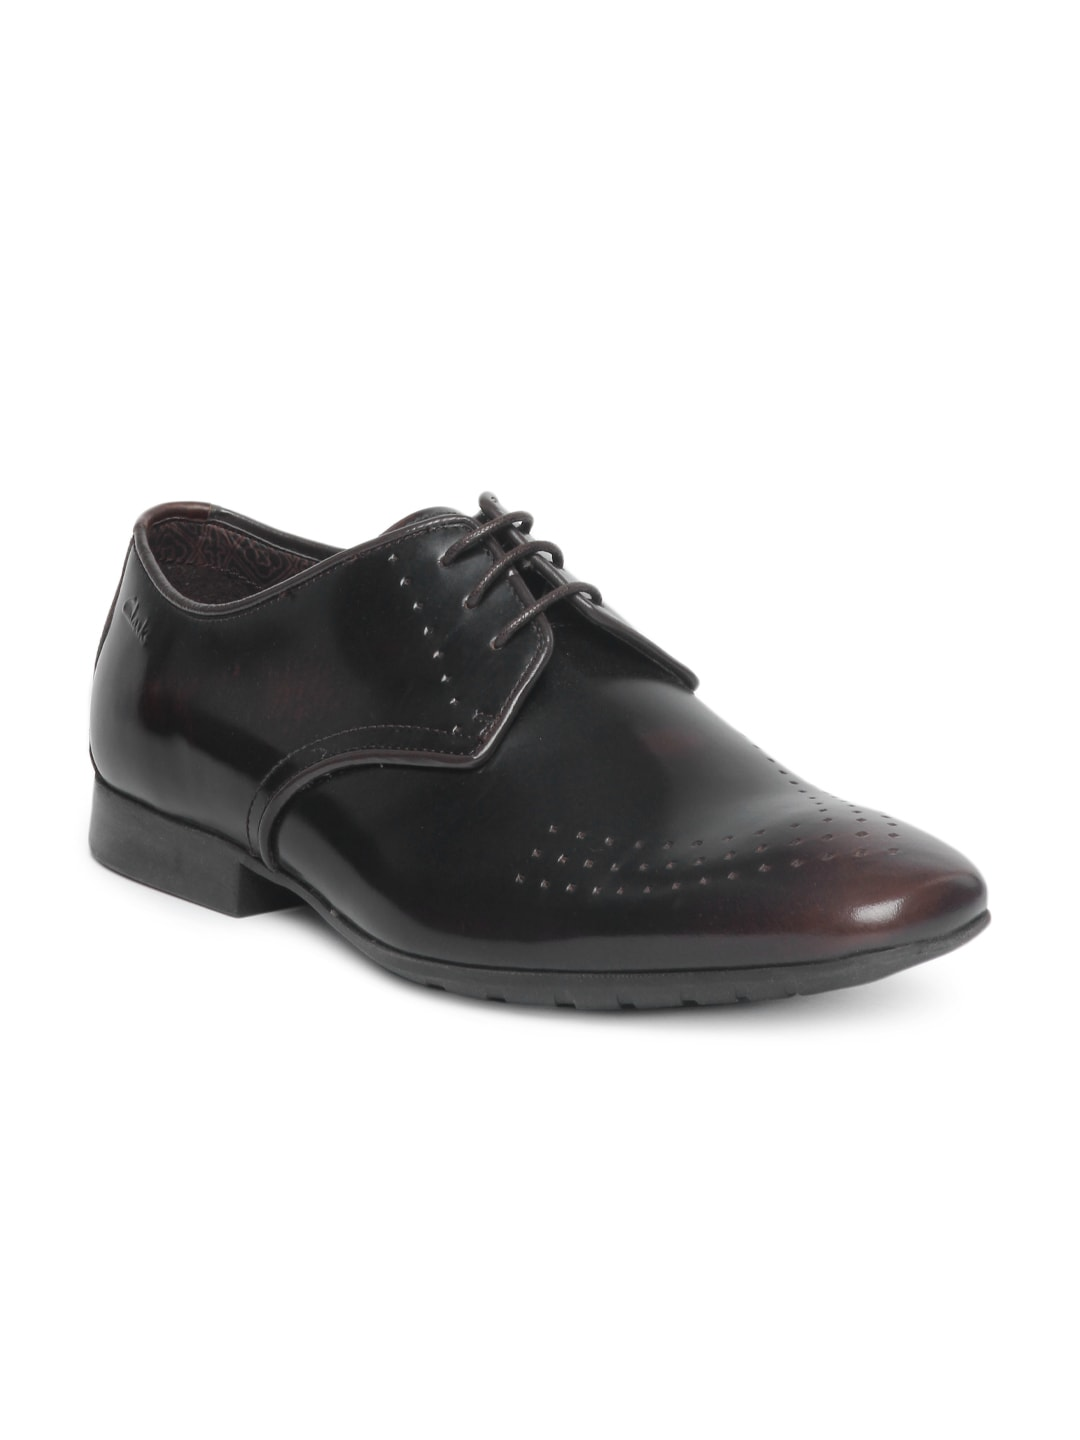

Clarks Men Brown Formal Shoes
12
1357


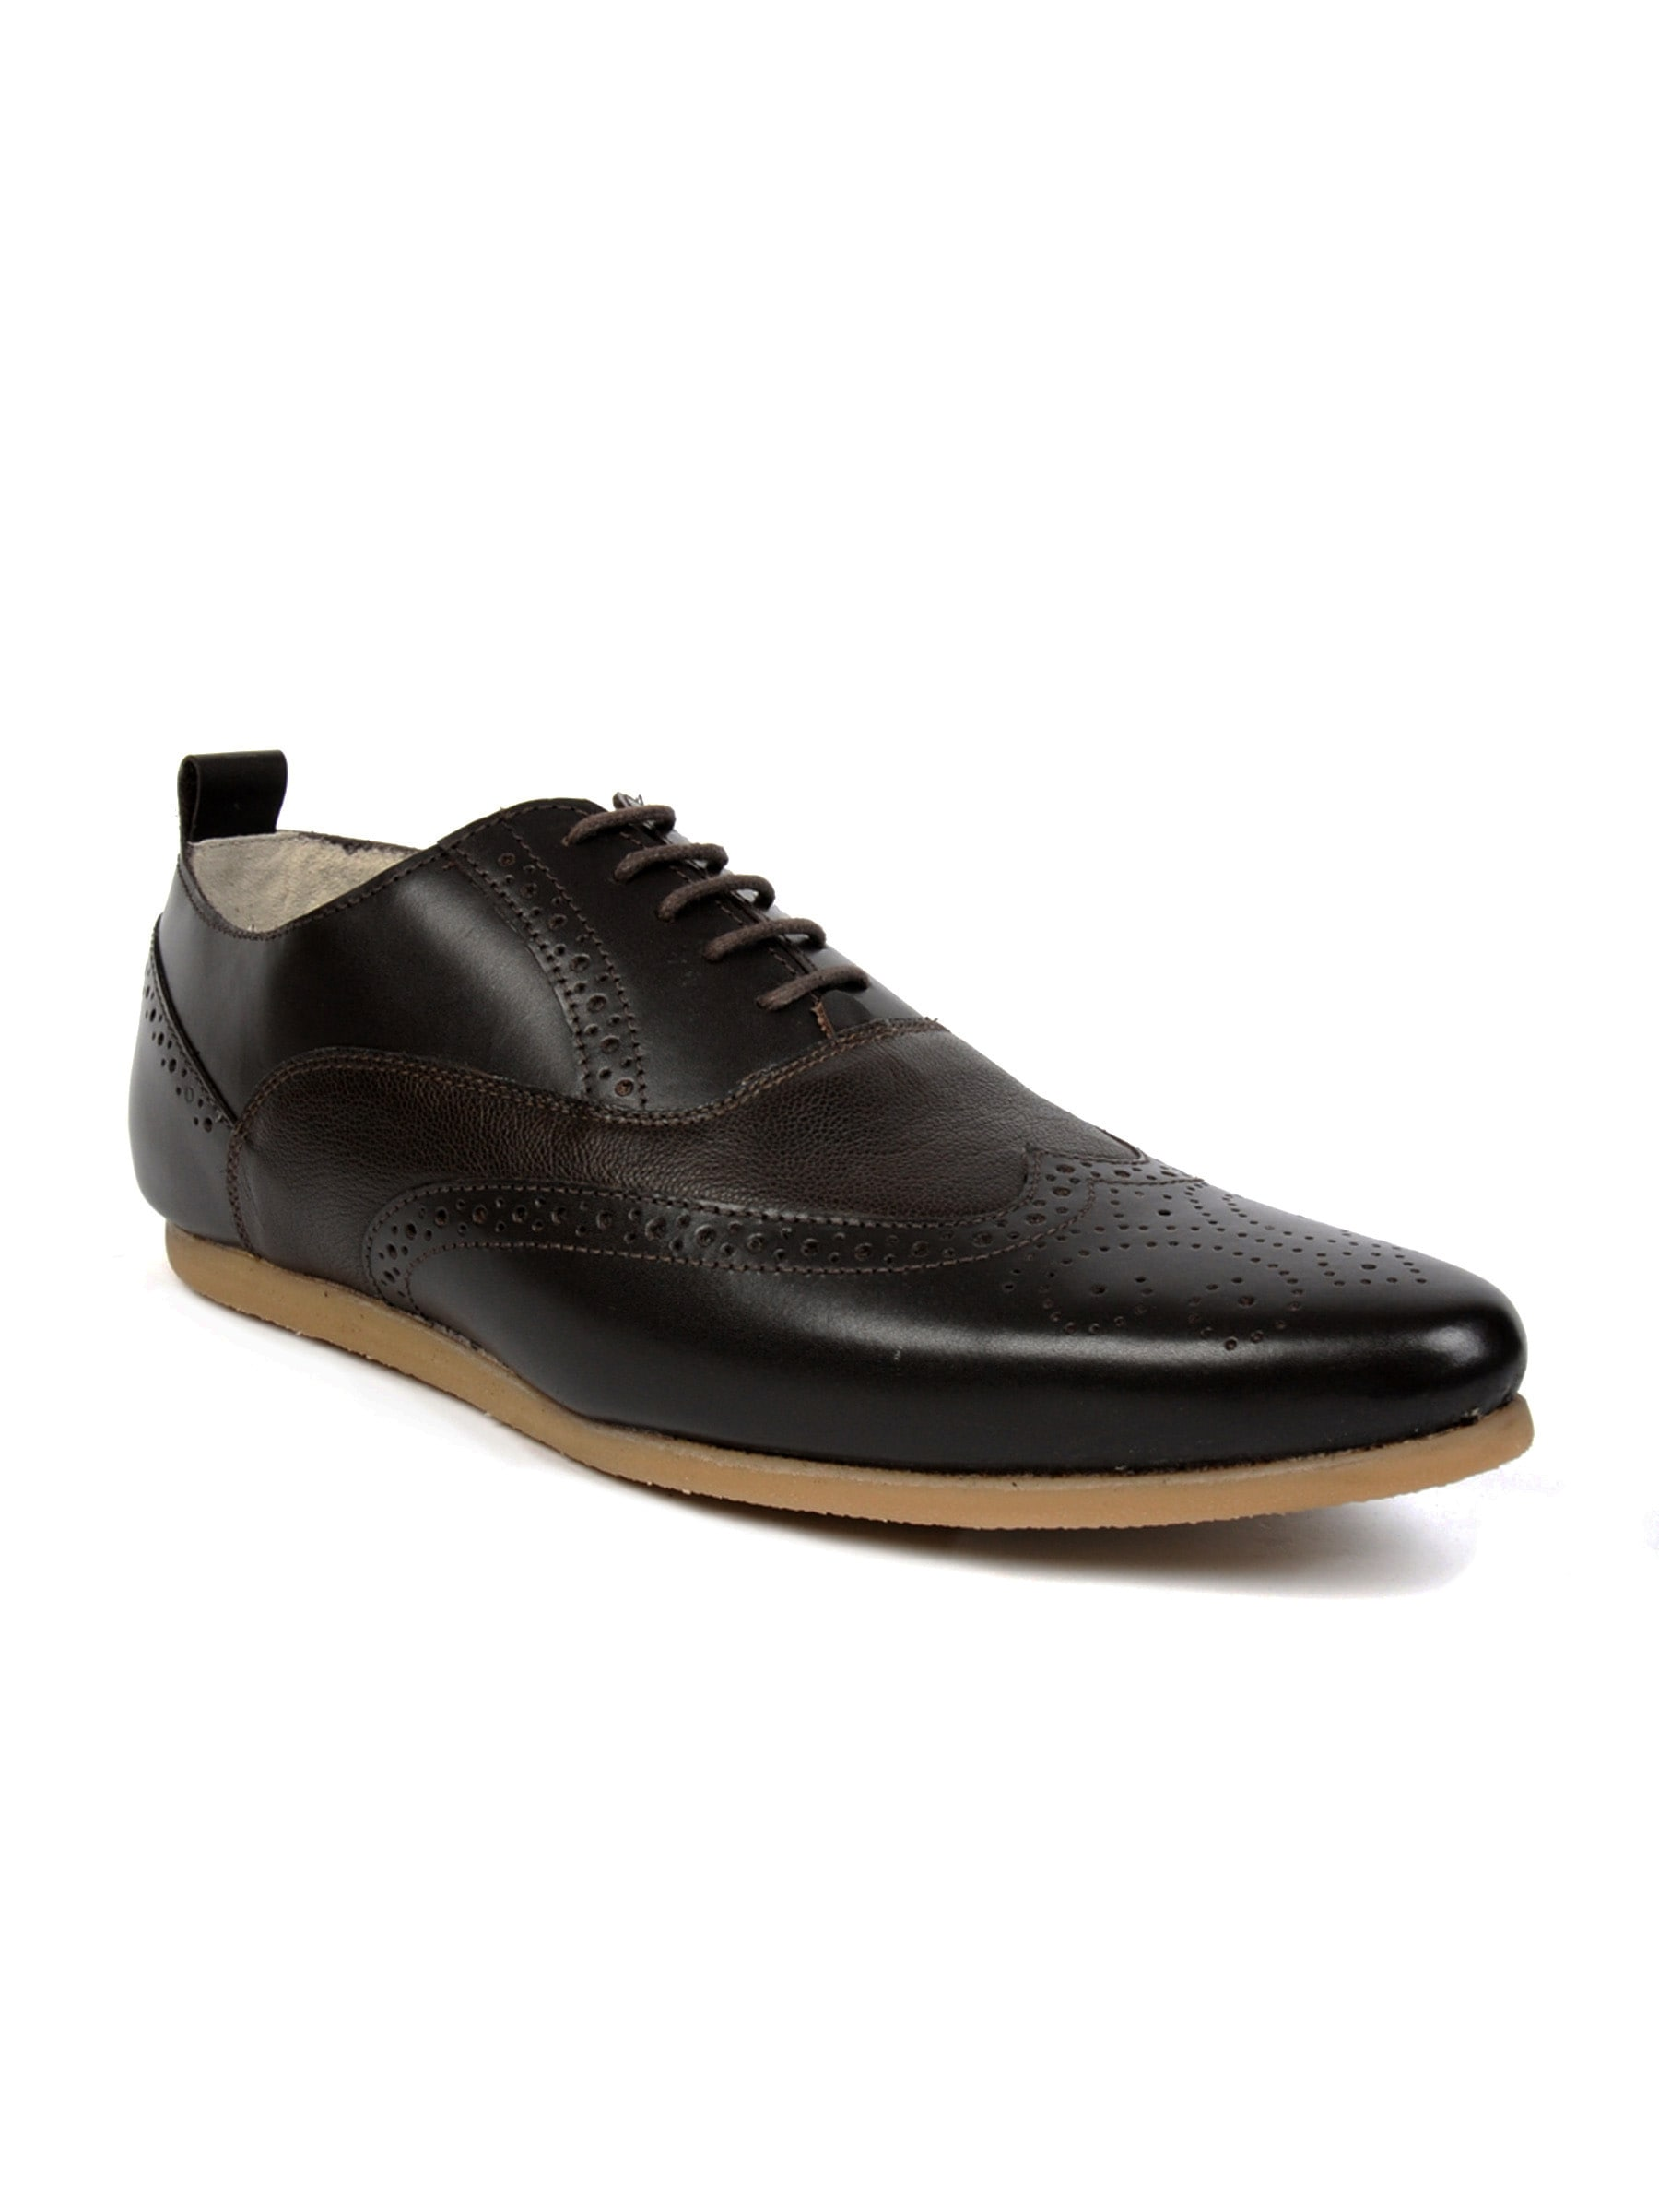

Carlton London Men Formal Brown Formal Shoes


In [122]:
for i in list(indices):
  print(i)
  ip_row = fashion_men_df[['ImageURL', 'ProductTitle']].loc[fashion_men_df['ProductId']==int(productids[i])]
  for index, mini_df in ip_row.iterrows():
    print(index)
    display(Image(url=mini_df['ImageURL'], width=224, height=224, embed=True))   # IPython 의 display
    print(mini_df['ProductTitle'])
    image.show()


### 누리호 이미지로 ResNet50 을 이용하여 예측해 보기

In [137]:
img_path = './nuriho.jpg'
target_size = 224

In [138]:
img = load_img(img_path)

In [139]:
img = img.resize((target_size, target_size))

In [141]:
import numpy as np
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions # preprocess_input는 이미지에 맞추어 알아서 스케일링 해준다.
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [142]:
x = img_to_array(img)
x = x[np.newaxis, :]
x = preprocess_input(x)

In [143]:
model = ResNet50(weights='imagenet')  # 아키텍처 모두를 가져와서 예측해 보겠다.

102967424/102967424 [==============================] - 1s 0us/step


In [144]:
preds = model.predict(x)

1/1 [==============================] - 3s 3s/step


In [145]:
print(decode_predictions(preds, top=3)[0])    # 누리호 이미지를 주고 이미지넷에서 뭐랑 비슷한지 확률상 3위까지 가져온것이다.

35363/35363 [==============================] - 0s 0us/step
[('n03773504', 'missile', 0.69865507), ('n04008634', 'projectile', 0.2849273), ('n04266014', 'space_shuttle', 0.01638082)]


### 오염된 데이터. 오염된 결과
image-net.org 는 세계 최대의 공개 이미지 데이터베이스입니다.
(1000만 이상 이미지 보유)
모든 이미지에 라벨이 붙어 이어, 대부분의 이미지 인공지능이 이 데이터를 사용하여 학습
라벨의 종류 : 재소자, 낙오자, 실패자, 위선자, 루저,,,,, --> 60만 여개.. (데이터를 삭제하게 됨.)

In [147]:
# 전이학습 : 파인튜닝 때 주의점 --- 이전내용을 없애면 안된다. (학습률 0.1의 5000분의 1, 500분의 1 등)